Enter the number of interviewees:200
Enter the number of epoc:40


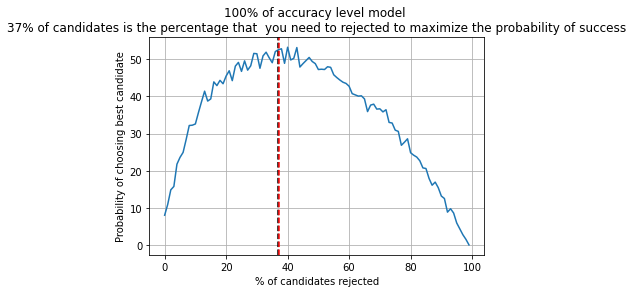

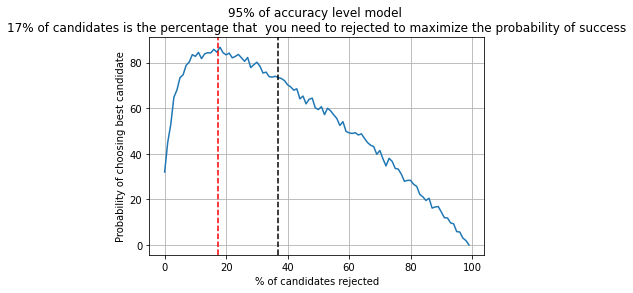

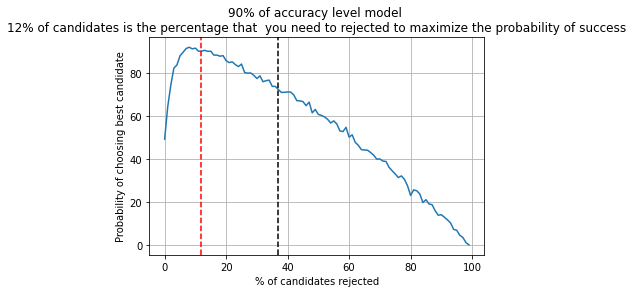

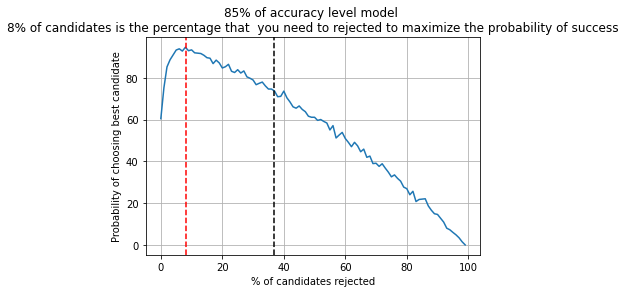

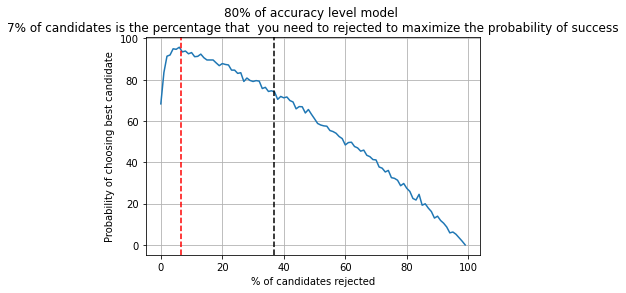

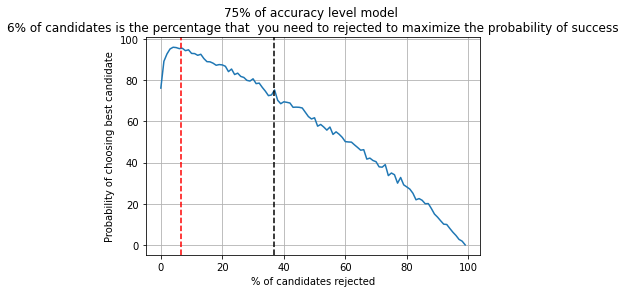

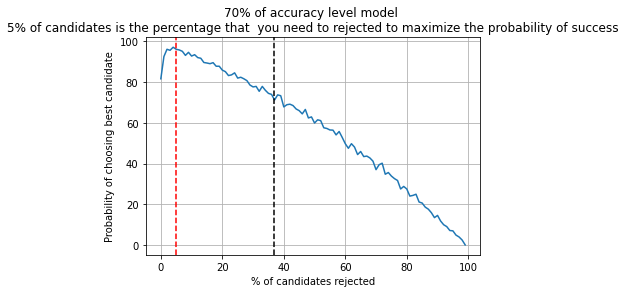

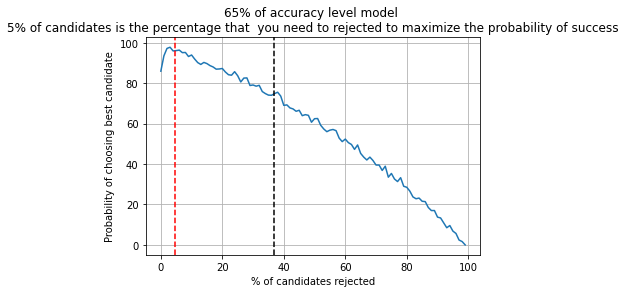

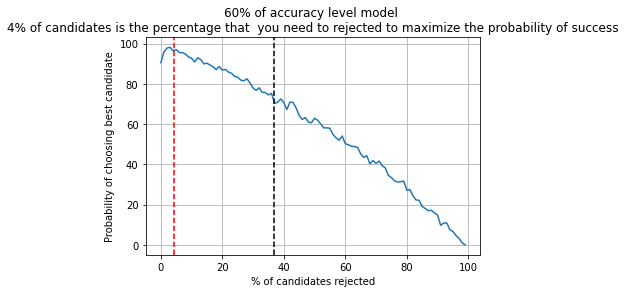

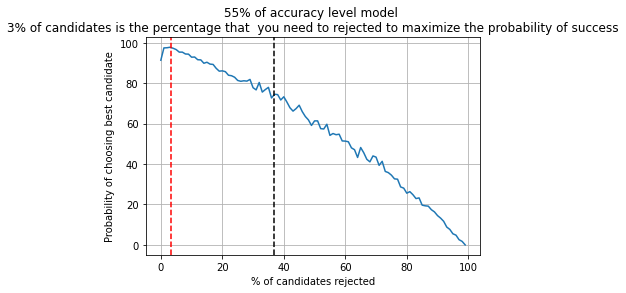

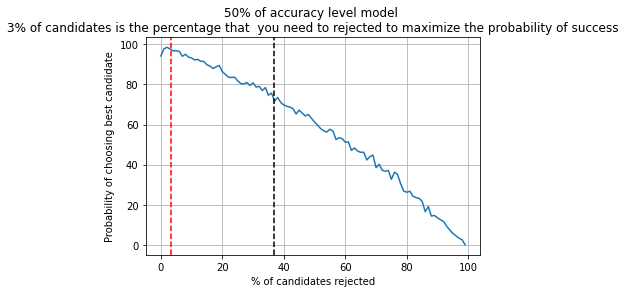

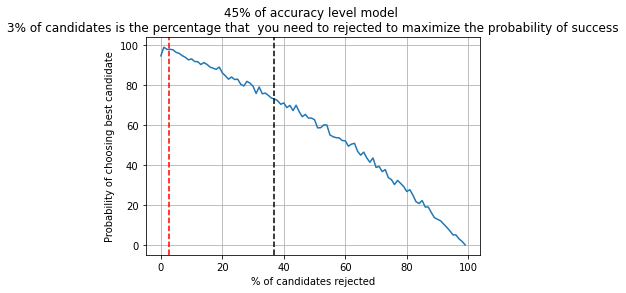

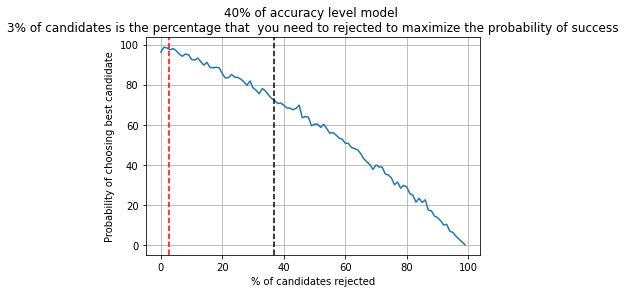

In [21]:
import matplotlib.pyplot as plt
import random
import numpy as np


def calculat (epoc,n,size,p):
    count = 0
    for j in range(epoc):
        best=0
        candidate=list()
        for i in range(n):
            candidate.append(random.randint(0,n))
        x=max(candidate)
        k=max(candidate[0:size+1])
        for i in range(size,n):
                if (candidate[i] >= k):
                    best = candidate[i]
                    break
        if best>=x*(p/100):
            count+=1
    return count

n= int(input('Enter the number of interviewees:'))
epoc= int(input('Enter the number of epoc:'))

Percent_accuracy=list(range(40,101,5))
Percent_accuracy.reverse()
min_size=list()
p_to_win=list()

for p in Percent_accuracy:
    graf=[0] * 100
    max_precent=list()
    for j in range(30):
        grade=list()
        for i in range(1,101):
            grade.append((calculat(epoc,n,round((i*n/100)),p)/epoc)*100)
            graf[i-1]= graf[i-1]+grade[i-1]
        max_precent.append(np.argmax(grade)+1)
    p_to_win.append(max(graf)/30)
    plt.plot([x/30 for x in graf])
    plt.xlabel('% of candidates rejected')
    plt.ylabel('Probability of choosing best candidate')
    plt.title(str(p)+'% of accuracy level model \n'+str(round(np.mean(max_precent)))+'% of candidates is the percentage that  you need to rejected to maximize the probability of success')
    plt.grid(True)
    plt.axvline(100/np.e, ls='--', c='black')
    plt.axvline(np.mean(max_precent), ls='--', c='red')
    plt.show()
    min_size.append(np.mean(max_precent))

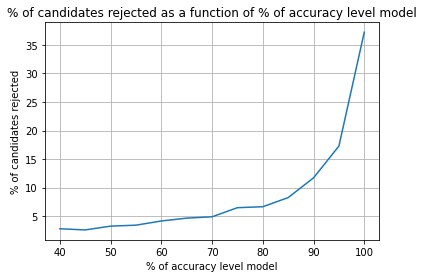

In [22]:
plt.plot(Percent_accuracy,min_size)
plt.title('% of candidates rejected as a function of % of accuracy level model')
plt.xlabel('% of accuracy level model')
plt.ylabel('% of candidates rejected')
plt.grid(True)
plt.show()

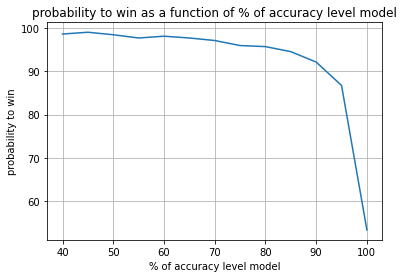

In [23]:
plt.plot(Percent_accuracy,p_to_win)
plt.title('probability to win as a function of % of accuracy level model')
plt.xlabel('% of accuracy level model')
plt.ylabel('probability to win')
plt.grid(True)
plt.show()